# Lectura del dataset

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

df = pd.read_excel('iMDb (dataset).xlsx')

df.head()

,Title,Year,Genres,Runtime (Minutes),Production Countries,Budget,Revenue,Popularity,Vote Average
0,Pirates of the Caribbean: At World's End,2007,"Adventure, Fantasy, Action",169,United States of America,300000000,961000000,31363664.0,6.9
1,Superman Returns,2006,"Adventure, Fantasy, Action, Science Fiction",154,United States of America,270000000,391081192,13284712.0,5.4
2,Spider-Man 3,2007,"Fantasy, Action, Adventure",139,United States of America,258000000,890871626,27614265.0,5.9
3,Harry Potter and the Half-Blood Prince,2009,"Adventure, Fantasy, Family",153,"United Kingdom, United States of America",250000000,933959197,19083723.0,7.4
4,Avatar,2009,"Action, Adventure, Fantasy, Science Fiction",162,"United States of America, United Kingdom",237000000,2787965087,185070892.0,7.2


# a)
 Representad de forma geográfica (que incluya también una representación cuantitativa por presupuestos) los países productores de las películas.

### Preprocesado
Asignaremos a todos los paises participantes en la producción de una película el presupuesto de la misma. Para ello dejarremos la columna Production Countries con un solo país, replicando las filas donde existan más de una valor en este campo.

In [5]:
countries_split = df.copy()
countries_split['Production Countries'] = countries_split['Production Countries'].str.split(', ')
countries_split = countries_split.explode('Production Countries')
pd.unique(countries_split['Production Countries'])

array(['United States of America', 'United Kingdom', 'Czech Republic',
       'Poland', 'Slovenia', 'Canada', 'New Zealand', 'Germany', 'Italy',
       'Malta', 'France', 'Netherlands', 'Australia', 'China', 'Japan',
       'Uruguay', 'Paraguay', 'Spain', 'Morocco', 'Ireland',
       'South Africa', 'Hungary', 'Switzerland', 'Hong Kong', 'Russia',
       'Romania', 'Pakistan', 'Mexico', 'Denmark', 'Iceland',
       'South Korea', 'Tunisia', 'Belgium', 'India', 'Costa Rica', 'Peru',
       'Brazil', 'Luxembourg', 'Qatar', 'United Arab Emirates',
       'Portugal', 'Liechtenstein'], dtype=object)

In [6]:
countries = (countries_split.groupby(by='Production Countries')
                    .agg({'Title':'count', 'Budget': 'sum'})
                    .sort_values(by='Title',ascending=False)
                    .reset_index()
                    .rename(columns={'Title':'Number of Films','Budget':'Total Budget',"Production Countries":"Production Country"})
)
countries.head(10)

,Production Country,Number of Films,Total Budget
0,United States of America,1003,70662737652
1,United Kingdom,140,11323630000
2,Germany,124,9188633049
3,France,58,3253366397
4,Canada,38,2602800000
5,Australia,32,2421500000
6,Italy,20,1583496397
7,Czech Republic,15,1356000000
8,Japan,14,966677699
9,New Zealand,10,968000000


### Visualización

In [7]:
fig = px.choropleth(countries,locationmode="country names",locations="Production Country",
                    color="Total Budget", 
                    hover_name="Production Country", 
                    color_continuous_scale=['#f0f9e8','#ccebc5','#a8ddb5','#7bccc4','#4eb3d3','#2b8cbe','#08589e']
                    )

fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="White",
)
fig.show()

# b)
 Evaluad de forma interactiva y dinámica cómo ha sido la evolución cuantitativa de los 
géneros  Drama,  Aventura,  Comedia  y  Acción  durante  el  periodo  1995-2005.  Utilizad 
para ello, por ejemplo, la herramienta Flourish (https://flourish.studio).

### Preprocesado

Filtramos por los años deseados

In [53]:
pd.unique(df["Year"].sort_values())

array([1927, 1962, 1976, 1978, 1979, 1980, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2011], dtype=int64)

In [54]:
genres = df.copy()
genres = genres[(genres.Year > 1994) & (genres.Year < 2006)]
pd.unique(genres["Year"].sort_values())

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005],
      dtype=int64)

Replicamos las filas para que solo exista un género en cada una.

In [55]:
genres['Genres'] = genres['Genres'].str.split(', ')
genres = genres.explode('Genres')
pd.unique(genres['Genres'])

array(['Adventure', 'Drama', 'Action', 'Romance', 'Thriller',
       'Science Fiction', 'Fantasy', 'Family', 'War', 'Comedy', 'Western',
       'Animation', 'Horror', 'History', 'Crime', 'Mystery', 'Music',
       'Documentary'], dtype=object)

Filtramos para quedarnos solo con drama, comedia, aventura y acción.

In [56]:
genres = genres[(genres.Genres == 'Drama') | (genres.Genres == 'Adventure') | (genres.Genres == 'Action')| (genres.Genres == 'Comedy')]
pd.unique(genres['Genres'])

array(['Adventure', 'Drama', 'Action', 'Comedy'], dtype=object)

Contamos el número de peliculas por genero y año

In [61]:
genresGrouped = (genres.groupby(by=['Genres','Year'])
                    .agg({'Title':'count'})
                    .sort_values(by='Year',ascending=True)
                    .reset_index()
                    .rename(columns={'Title':'Number of Films'})
)
genresGrouped.head(10)

,Genres,Year,Number of Films
0,Action,1995,18
1,Comedy,1995,3
2,Adventure,1995,10
3,Drama,1995,15
4,Comedy,1996,11
5,Drama,1996,24
6,Adventure,1996,12
7,Action,1996,16
8,Comedy,1997,9
9,Drama,1997,19


In [62]:
genresPivoted = genresGrouped.pivot(index='Year', columns='Genres', values='Number of Films').rename_axis(None, axis=1).reset_index()
genresPivoted

,Year,Action,Adventure,Comedy,Drama
0,1995,18,10,3,15
1,1996,16,12,11,24
2,1997,24,17,9,19
3,1998,17,15,12,18
4,1999,17,10,21,28
5,2000,21,17,20,21
6,2001,30,17,20,21
7,2002,29,23,20,29
8,2003,30,20,25,19
9,2004,27,23,27,24


In [59]:
genresPivoted.to_csv("EjercicioB.csv",index=False)

### Visualización:
https://public.flourish.studio/visualisation/10154708/

# c)
Identificad  cuál  ha  sido  la  película  más  taquillera  y  cuál  fue  la  décima  que  más 
recaudó. ¿Cómo quedan el resto de las películas que forman el top-ten de la taquilla?

In [52]:
df[["Title","Revenue"]].sort_values(by="Revenue",ascending=False).reset_index(drop=True).head(10)

,Title,Revenue
0,Avatar,2787965087
1,Titanic,1845034188
2,The Lord of the Rings: The Return of the King,1118888979
3,Pirates of the Caribbean: Dead Man's Chest,1065659812
4,The Dark Knight,1004558444
5,Harry Potter and the Philosopher's Stone,976475550
6,Pirates of the Caribbean: At World's End,961000000
7,Finding Nemo,940335536
8,Harry Potter and the Order of the Phoenix,938212738
9,Harry Potter and the Half-Blood Prince,933959197


La película más taquillera es Avatar y la décima es Harry Potter and the Half-Blood Prince. El top-ten se puede visualizar en la tabla anterior.

# d)
Describid, de forma estática, la evolución cuantitativa de los géneros 
cinematográficos durante el periodo 1995-2005

In [81]:
genresPivoted

,Year,Action,Adventure,Comedy,Drama
0,1995,18,10,3,15
1,1996,16,12,11,24
2,1997,24,17,9,19
3,1998,17,15,12,18
4,1999,17,10,21,28
5,2000,21,17,20,21
6,2001,30,17,20,21
7,2002,29,23,20,29
8,2003,30,20,25,19
9,2004,27,23,27,24


In [80]:
fig = px.line(genresGrouped, x="Year", y="Number of Films", color='Genres')
fig.show()

# e)
Comparad,  respecto  a  la  película  The  Lord  of  the  Rings:  The  Two  Towers,  los 
ingresos que obtuvieron las veinte películas más taquilleras.


In [8]:
top20 = df[["Title","Revenue"]].sort_values(by="Revenue",ascending=False).reset_index(drop=True).head(20)
top20

,Title,Revenue
0,Avatar,2787965087
1,Titanic,1845034188
2,The Lord of the Rings: The Return of the King,1118888979
3,Pirates of the Caribbean: Dead Man's Chest,1065659812
4,The Dark Knight,1004558444
5,Harry Potter and the Philosopher's Stone,976475550
6,Pirates of the Caribbean: At World's End,961000000
7,Finding Nemo,940335536
8,Harry Potter and the Order of the Phoenix,938212738
9,Harry Potter and the Half-Blood Prince,933959197


In [9]:
LoTR2_Rev = top20[top20.Title == "The Lord of the Rings: The Two Towers"]["Revenue"].values[0]

fig = px.bar(top20, x="Revenue", y="Title", orientation='h',color_discrete_sequence=['gray'])
fig.add_vline(x=LoTR2_Rev, line_width=3, line_dash="dash", line_color="blue")
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

# f)
Mostrad si existe algún tipo de correlación (positiva o negativa) entre el presupuesto y 
los ingresos de las cien películas más taquilleras. Y ¿entre los ingresos recaudados y la 
puntuación media obtenida en las votaciones de los espectadores? y ¿entre el número 
de  visitantes  de  la  página  de  la  película  en  IMDb  (popularidad)  y  la  puntación  media 
obtenida en las votaciones de los espectadores? 

In [12]:
top100 = df.sort_values(by="Revenue",ascending=False).reset_index(drop=True).head(100)
top100

,Title,Year,Genres,Runtime (Minutes),Production Countries,Budget,Revenue,Popularity,Vote Average
0,Avatar,2009,"Action, Adventure, Fantasy, Science Fiction",162,"United States of America, United Kingdom",237000000,2787965087,185070892.0,7.2
1,Titanic,1997,"Drama, Romance, Thriller",194,United States of America,200000000,1845034188,2688907.0,7.5
2,The Lord of the Rings: The Return of the King,2003,"Adventure, Fantasy, Action",201,"New Zealand, United States of America",94000000,1118888979,29324358.0,8.1
3,Pirates of the Caribbean: Dead Man's Chest,2006,"Adventure, Fantasy, Action",151,United States of America,200000000,1065659812,29455314.0,7.0
4,The Dark Knight,2008,"Drama, Action, Crime, Thriller",152,"United Kingdom, United States of America",185000000,1004558444,123167259.0,8.3
...,...,...,...,...,...,...,...,...,...
95,Sex and the City,2008,"Comedy, Drama, Romance",145,United States of America,65000000,415252786,9170332.0,6.0
96,Night at the Museum: Battle of the Smithsonian,2009,"Adventure, Fantasy, Action, Comedy, Family",105,"United States of America, Canada",150000000,413106170,15417181.0,5.9
97,Batman,1989,"Fantasy, Action",126,"United Kingdom, United States of America",35000000,411348924,1910673.0,7.0
98,Signs,2002,"Drama, Thriller, Science Fiction, Mystery",106,United States of America,72000000,408247917,11211568.0,6.4


Correlación Popularity y Vote Average, no parece que exista o es muy débil. (R2 = 0.13)

In [33]:
fig = px.scatter(top100, x="Revenue", y="Budget", trendline="ols",hover_data=["Title"])
r2 = px.get_trendline_results(fig).px_fit_results.iloc[0].rsquared
fig.update_layout(
    title_text=f'R2: ' + "{:.2f}".format(r2), 
)
fig.show()

Correlación Popularity y Vote Average, no parece que exista o es muy débil. (R2 = 0.06)

In [31]:
fig = px.scatter(top100, x="Revenue", y="Vote Average", trendline="ols",hover_data=["Title"])
r2 = px.get_trendline_results(fig).px_fit_results.iloc[0].rsquared
fig.update_layout(
    title_text=f'R2: ' + "{:.2f}".format(r2), 
)
fig.show()

Correlación Popularity y Vote Average, no parece que exista o es muy débil. (R2 = 0.10)

In [32]:
fig = px.scatter(top100, x="Popularity", y="Vote Average", trendline="ols",hover_data=["Title"])
r2 = px.get_trendline_results(fig).px_fit_results.iloc[0].rsquared
fig.update_layout(
    title_text=f'R2: ' + "{:.2f}".format(r2), 
)
fig.show()

# g)
Analizad de forma visual el ROI (retorno de la inversión) de las películas estrenadas en 
1990.

### Preprocesado

In [3]:
films1990 = df[df.Year == 1990]
films1990.head(10)

,Title,Year,Genres,Runtime (Minutes),Production Countries,Budget,Revenue,Popularity,Vote Average
364,Die Hard 2,1990,"Action, Thriller",124,United States of America,70000000,240031094,18785984.0,6.6
433,Total Recall,1990,"Action, Adventure, Science Fiction",113,United States of America,65000000,261317921,12954444.0,7.1
475,Days of Thunder,1990,Adventure,107,United States of America,60000000,157920733,7046753.0,5.9
593,The Godfather: Part III,1990,"Crime, Drama, Thriller",162,"Italy, United States of America",54000000,136766062,17185349.0,7.1
640,Gremlins 2: The New Batch,1990,"Comedy, Horror, Fantasy",106,United States of America,50000000,41482207,14383185.0,6.3
703,The Adventures of Ford Fairlane,1990,"Action, Comedy, Thriller, Crime, Mystery",104,United States of America,49000000,20423389,3834949.0,6.2
719,Dick Tracy,1990,"Adventure, Action, Comedy, Thriller, Crime",103,United States of America,47000000,103738726,8304776.0,5.9
720,The Bonfire of the Vanities,1990,"Comedy, Drama",125,United States of America,47000000,15691192,5507082.0,5.3
794,Rocky V,1990,Drama,104,United States of America,42000000,119946358,14007329.0,5.3
822,Back to the Future Part III,1990,"Adventure, Comedy, Family, Science Fiction",118,United States of America,40000000,244527583,13043999.0,7.1


Calculamos el ROI.

In [6]:
pd.options.mode.chained_assignment = None 
films1990["ROI"] = (films1990["Revenue"] - films1990["Budget"]) / films1990["Budget"]

### Visualización

In [10]:
fig = px.bar(films1990, x="ROI", y="Title", orientation='h',color_discrete_sequence=['gray'])
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

# h)
Describid  cómo  es  la  distribución  del  conjunto  total  de  películas  utilizando  como 
criterio el presupuesto de las mismas.

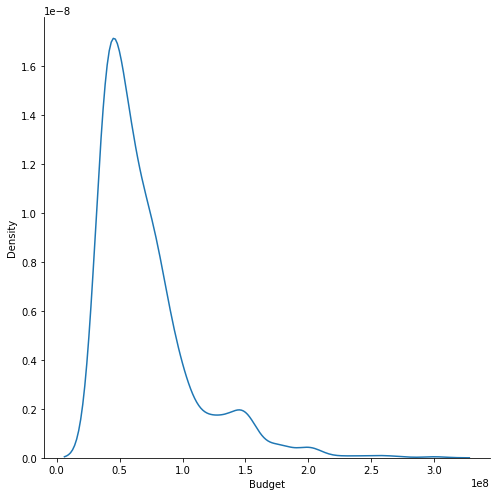

In [5]:
sns.displot(data=df, x="Budget", kind="kde",height=7)

# i)
En cada uno de los años del periodo 1995-2005, mostrad la relación cuantitativa que 
mantienen los géneros cinematográficos. 


### Preprocesado

Filtramos por loa ños indicados.

In [4]:
genresR = df.copy()
genresR = genresR[(genresR.Year > 1994) & (genresR.Year < 2006)]
genresR["Year"] = genresR["Year"].astype(str)
pd.unique(genresR["Year"].sort_values())

array(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005'], dtype=object)

Simplificamos la columna de generos para quedarnos con el primero.

In [5]:
pd.options.mode.chained_assignment = None 
genresR['Genres'] = genresR['Genres'].str.split(', ').str[0]
genresR.head(10)

,Title,Year,Genres,Runtime (Minutes),Production Countries,Budget,Revenue,Popularity,Vote Average
7,King Kong,2005,Adventure,187,"New Zealand, United States of America, Germany",207000000,550000000,19761164.0,6.6
8,Titanic,1997,Drama,194,United States of America,200000000,1845034188,2688907.0,7.5
9,Terminator 3: Rise of the Machines,2003,Action,109,"Germany, United Kingdom, United States of America",200000000,435000000,20818907.0,5.9
10,Spider-Man 2,2004,Action,127,United States of America,200000000,783766341,10834506.0,6.7
18,"The Chronicles of Narnia: The Lion, the Witch ...",2005,Adventure,143,"United Kingdom, United States of America",180000000,748806957,1813542.0,6.7
21,Waterworld,1995,Adventure,135,United States of America,175000000,264218220,16885184.0,5.9
22,Troy,2004,Adventure,163,"United States of America, Malta, United Kingdom",175000000,497409852,15387275.0,6.9
27,Wild Wild West,1999,Action,106,United States of America,170000000,222104681,9887602.0,5.1
28,The Polar Express,2004,Adventure,100,United States of America,165000000,305875730,1427536.0,6.4
29,Speed 2: Cruise Control,1997,Action,121,United States of America,160000000,164508066,11268531.0,4.1


Agrupamos por genero y año para extraer la información cuantitativa.

In [6]:
genresGroupedR = (genresR.groupby(by=['Genres','Year'])
                    .agg({'Title':'count'})
                    .sort_values(by='Year',ascending=True)
                    .reset_index()
                    .rename(columns={'Title':'Number of Films'})
)
genresGroupedR.head(10)

,Genres,Year,Number of Films
0,Action,1995,15
1,Crime,1995,1
2,Drama,1995,4
3,War,1995,1
4,Science Fiction,1995,2
5,Fantasy,1995,1
6,Adventure,1995,4
7,Comedy,1995,1
8,History,1995,1
9,Comedy,1996,7


### Visualización

Asumiendo que sólo nos importa los géneros del ejercicio b:

In [16]:
genresGroupedRSmall = genresGroupedR[(genresGroupedR.Genres == 'Drama') | (genresGroupedR.Genres == 'Adventure') | (genresGroupedR.Genres == 'Action')| (genresGroupedR.Genres == 'Comedy')]
fig = px.bar(genresGroupedRSmall, x="Genres", y="Number of Films",facet_col="Year",facet_col_wrap=6)
fig.show()

Visualizando todos los géneros:

In [21]:
fig = px.bar(genresGroupedR, x="Genres", y="Number of Films",facet_col="Year",facet_col_wrap=2,height=1000)
fig.show()

# j)
Representad (en el mínimo espacio posible y de forma interactiva) los ingresos de las 
películas  de  los  años  1990  y  1991  de  forma  que  se  muestre  la  estructura  jerárquica 
entre el género (el primero que aparece en la celda), el año de estreno y la valoración de 
los espectadores (películas mejor valoradas (con una valoración superior a 6); películas 
peor valoradas (con una valoración igual o inferior a 6))

### Preprocesado

Filtramos por los años 1990 y 1991.

In [34]:
films1990 = df[(df.Year == 1990) | (df.Year == 1991)]
films1990["Year"] = films1990["Year"].astype(str)
films1990.head(10)

,Title,Year,Genres,Runtime (Minutes),Production Countries,Budget,Revenue,Popularity,Vote Average
140,Terminator 2: Judgment Day,1991,"Action, Thriller, Science Fiction",137,"France, United States of America",100000000,520000000,22661695.0,7.7
324,Backdraft,1991,"Action, Crime, Drama, Mystery, Thriller",137,United States of America,75000000,152368585,9883727.0,6.4
364,Die Hard 2,1990,"Action, Thriller",124,United States of America,70000000,240031094,18785984.0,6.6
380,Hook,1991,"Adventure, Fantasy, Comedy, Family",144,United States of America,70000000,300854823,14508137.0,6.7
433,Total Recall,1990,"Action, Adventure, Science Fiction",113,United States of America,65000000,261317921,12954444.0,7.1
438,Hudson Hawk,1991,"Action, Adventure, Comedy",100,United States of America,65000000,17218080,9782014.0,5.4
475,Days of Thunder,1990,Adventure,107,United States of America,60000000,157920733,7046753.0,5.9
593,The Godfather: Part III,1990,"Crime, Drama, Thriller",162,"Italy, United States of America",54000000,136766062,17185349.0,7.1
640,Gremlins 2: The New Batch,1990,"Comedy, Horror, Fantasy",106,United States of America,50000000,41482207,14383185.0,6.3
703,The Adventures of Ford Fairlane,1990,"Action, Comedy, Thriller, Crime, Mystery",104,United States of America,49000000,20423389,3834949.0,6.2


Simplificamos la columna de generos para quedarnos con el primero.

In [35]:
pd.options.mode.chained_assignment = None 
films1990['Genres'] = films1990['Genres'].str.split(', ').str[0]
films1990.head(10)

,Title,Year,Genres,Runtime (Minutes),Production Countries,Budget,Revenue,Popularity,Vote Average
140,Terminator 2: Judgment Day,1991,Action,137,"France, United States of America",100000000,520000000,22661695.0,7.7
324,Backdraft,1991,Action,137,United States of America,75000000,152368585,9883727.0,6.4
364,Die Hard 2,1990,Action,124,United States of America,70000000,240031094,18785984.0,6.6
380,Hook,1991,Adventure,144,United States of America,70000000,300854823,14508137.0,6.7
433,Total Recall,1990,Action,113,United States of America,65000000,261317921,12954444.0,7.1
438,Hudson Hawk,1991,Action,100,United States of America,65000000,17218080,9782014.0,5.4
475,Days of Thunder,1990,Adventure,107,United States of America,60000000,157920733,7046753.0,5.9
593,The Godfather: Part III,1990,Crime,162,"Italy, United States of America",54000000,136766062,17185349.0,7.1
640,Gremlins 2: The New Batch,1990,Comedy,106,United States of America,50000000,41482207,14383185.0,6.3
703,The Adventures of Ford Fairlane,1990,Action,104,United States of America,49000000,20423389,3834949.0,6.2


Obtenemos la simplificación de la valoración de las películas.

In [36]:
films1990['Is Well Valued'] = np.where(films1990['Vote Average']> 6, True, False)
films1990.head(10)

,Title,Year,Genres,Runtime (Minutes),Production Countries,Budget,Revenue,Popularity,Vote Average,Is Well Valued
140,Terminator 2: Judgment Day,1991,Action,137,"France, United States of America",100000000,520000000,22661695.0,7.7,True
324,Backdraft,1991,Action,137,United States of America,75000000,152368585,9883727.0,6.4,True
364,Die Hard 2,1990,Action,124,United States of America,70000000,240031094,18785984.0,6.6,True
380,Hook,1991,Adventure,144,United States of America,70000000,300854823,14508137.0,6.7,True
433,Total Recall,1990,Action,113,United States of America,65000000,261317921,12954444.0,7.1,True
438,Hudson Hawk,1991,Action,100,United States of America,65000000,17218080,9782014.0,5.4,False
475,Days of Thunder,1990,Adventure,107,United States of America,60000000,157920733,7046753.0,5.9,False
593,The Godfather: Part III,1990,Crime,162,"Italy, United States of America",54000000,136766062,17185349.0,7.1,True
640,Gremlins 2: The New Batch,1990,Comedy,106,United States of America,50000000,41482207,14383185.0,6.3,True
703,The Adventures of Ford Fairlane,1990,Action,104,United States of America,49000000,20423389,3834949.0,6.2,True


### Visualización

In [50]:
fig = px.bar(films1990, x="Year", y="Revenue", color="Is Well Valued",facet_col="Genres",color_discrete_sequence=['#a8ddb5','#2b8cbe'])
fig.show()